## 卷积层

In [35]:
import tensorflow as tf
import cv2
from PIL import Image
from matplotlib import pyplot as plt

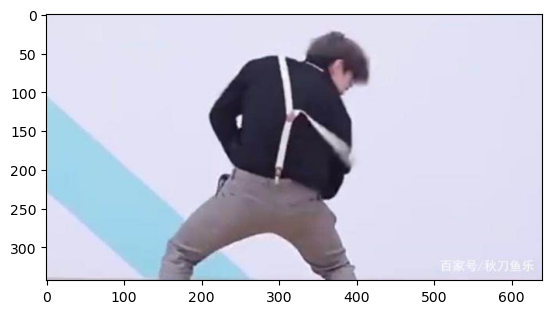

In [36]:
img = cv2.imread('./1.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [37]:
img = img.reshape(1,343,640,3)
img = img/255
img.shape

(1, 343, 640, 3)

In [38]:
#卷积层
layer=tf.keras.layers.Conv2D(filters=5,#卷积核个数
                       kernel_size=3,#卷积核尺寸
                       strides=1,#步长
                       padding='same')#填充 valid,same

In [39]:
out = layer(img)
out.shape

TensorShape([1, 343, 640, 5])

In [40]:
img_out = out[0,:,:,0]

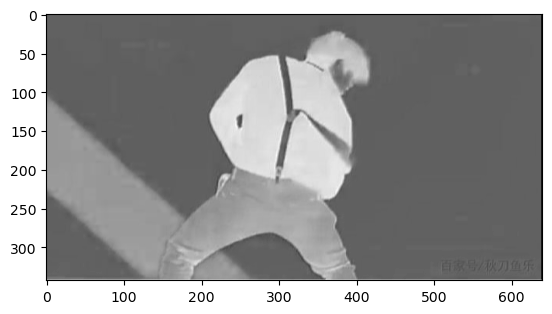

In [41]:
plt.imshow(img_out,'gray')

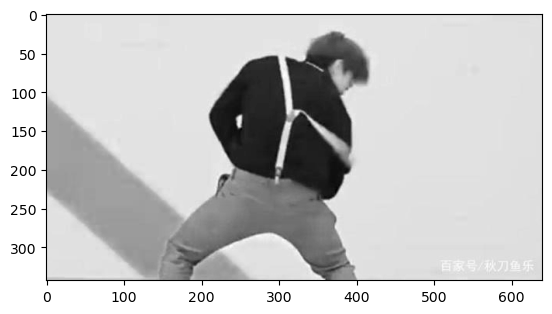

In [42]:
plt.imshow(img[0,:,:,0],'gray')

In [44]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [51]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [52]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(5,kernel_size=3,strides=1,padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [55]:
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [56]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2717 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2700 - accuracy: 0.9244
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2692 - accuracy: 0.9246
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.9249
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9251
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2660 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2647 - accuracy: 0.9260
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2639 - accuracy: 0.9265
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2628 - accuracy: 0.9271
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.262

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (32, 28, 28, 5)           50        
                                                                 
 flatten_1 (Flatten)         (32, 3920)                0         
                                                                 
 dense_1 (Dense)             (32, 10)                  39210     
                                                                 
Total params: 39,260
Trainable params: 39,260
Non-trainable params: 0
_________________________________________________________________


## 池化层

### 最大池化

In [59]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(5,kernel_size=3,strides=1,padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [60]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5509 - accuracy: 0.8429
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.9077
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2861 - accuracy: 0.9162
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2626 - accuracy: 0.9245
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2393 - accuracy: 0.9313
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2163 - accuracy: 0.9388
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1955 - accuracy: 0.9450
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1775 - accuracy: 0.9502
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1622 - accuracy: 0.9547
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.149

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (32, 28, 28, 5)           50        
                                                                 
 max_pooling2d (MaxPooling2D  (32, 14, 14, 5)          0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (32, 980)                 0         
                                                                 
 dense_2 (Dense)             (32, 10)                  9810      
                                                                 
Total params: 9,860
Trainable params: 9,860
Non-trainable params: 0
_________________________________________________________________


### 平均池化

In [62]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(5,kernel_size=3,strides=1,padding='same'),
    tf.keras.layers.AveragePooling2D(pool_size=2,strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [63]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5312 - accuracy: 0.8536
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3266 - accuracy: 0.9047
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3106 - accuracy: 0.9099
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3018 - accuracy: 0.9130
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.9150
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9167
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2895 - accuracy: 0.9182
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2876 - accuracy: 0.9185
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2851 - accuracy: 0.9198
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.283